<a href="https://colab.research.google.com/github/facundoandrisani/Perfomance-de-un-jugador-Andrisani/blob/main/Performance_de_un_jugador_Andrisani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
pip install --upgrade LanusStats webdriver-manager lxml matplotlib plottable kaleido

In [ ]:
import LanusStats as ls
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.patches as mpatches
from io import StringIO
import os
import plotly.express as px
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from PIL import Image, ImageDraw, ImageOps
from mplsoccer import PyPizza, add_image, FontManager, VerticalPitch, Pitch
from scipy import stats
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import display
from matplotlib.patches import FancyBboxPatch, Rectangle, Patch
from google.colab import files
import requests
import re
import json
import seaborn as sns

fbref = ls.Fbref()
sofa = ls.SofaScore()
fotmob = ls.FotMob()

In [ ]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)

# Informacion disponible

In [ ]:
ls.get_available_pages()

dict_keys(['Fbref', 'Sofascore', '365Scores', 'Fotmob', 'Transfermarkt', 'DataFactory'])

# Analisis del jugador

### Disponible

In [ ]:
ls.get_available_leagues('Fbref')

['Copa de la Liga',
 'Primera Division Argentina',
 'Primera Division Uruguay',
 'Brasileirao',
 'Brasileirao B',
 'Primera Division Colombia',
 'Primera Division Chile',
 'Primera Division Peru',
 'Primera Division Venezuela',
 'Primera Division Ecuador',
 'Primera Division Bolivia',
 'Primera Division Paraguay',
 'Brasileirao F',
 'MLS',
 'USL Championship',
 'Premier League',
 'La Liga',
 'Ligue 1',
 'Bundesliga',
 'Serie A',
 'Big 5 European Leagues',
 'Danish Superliga',
 'Eredivise',
 'Primeira Liga Portugal',
 'Copa America',
 'Euros',
 'Saudi League',
 'EFL Championship',
 'La Liga 2',
 'Belgian Pro League',
 'Challenger Pro League',
 '2. Bundesliga',
 'Ligue 2',
 'Serie B',
 'J1 League',
 'NSWL',
 'Wowens Super League',
 'Liga F',
 'Premier Division South Africa',
 'Champions League',
 'Europa League',
 'Conference League',
 'Copa Libertadores',
 'Liga MX']

In [ ]:
ls.get_available_season_for_leagues("Fbref", "Premier League")

{'id': 9,
 'slug': 'Premier-League',
 'seasons': {'2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025'}}

In [ ]:
fbref.possible_stats

['stats',
 'keepers',
 'keepersadv',
 'shooting',
 'passing',
 'passing_types',
 'gca',
 'defense',
 'possession',
 'playingtime',
 'misc']

### Transformacion del df

In [ ]:
df_stats = fbref.get_player_season_stats('stats', 'Premier League', '2024-2025')
df_stats = df_stats[['Player',
 '90s',
 'Age',
 'Ast',
 'Gls',
 'Nation',
 'Pos',
 'Squad',
 'xAG',
 'xG']]

print(df_stats.head())

df_tiros = fbref.get_player_season_stats('shooting', 'Premier League', '2024-2025')
df_tiros = df_tiros[['Player',
 'Squad',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT']]

print(df_tiros.head())

df_pases = fbref.get_player_season_stats('passing', 'Premier League', '2024-2025')
df_pases = df_pases[['Player',
 'Squad',
 'Cmp%',
 'xA',
 'A-xAG',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP']]

print(df_pases.head())

df_gca = fbref.get_player_season_stats('gca', 'Premier League', '2024-2025')
df_gca = df_gca[['Player',
 'Squad',
 'SCA',
 'SCA90',
 'GCA',
 'GCA90']]

print(df_gca.head())

df_pos = fbref.get_player_season_stats('possession', 'Premier League', '2024-2025')
df_pos = df_pos[['Player',
 'Squad',
 'Succ%']]
print(df_pos.head())

Starting to scrape player data from Fbref...
              Player   90s Age Ast   Ast Gls   Gls   Nation    Pos  \
0         Max Aarons   1.0  24   0  0.00   0  0.00  eng ENG     DF   
1  Joshua Acheampong   1.9  18   0  0.00   0  0.00  eng ENG     DF   
2        Tyler Adams  21.8  25   3  0.14   0  0.00   us USA     MF   
3   Tosin Adarabioyo  15.7  26   1  0.06   1  0.06  eng ENG     DF   
4      Simon Adingra  12.2  22   2  0.16   2  0.16   ci CIV  FW,MF   

         Squad  xAG   xAG   xG    xG  
0  Bournemouth  0.0  0.00  0.0  0.00  
1      Chelsea  0.0  0.00  0.2  0.12  
2  Bournemouth  1.0  0.05  1.6  0.07  
3      Chelsea  0.2  0.01  0.9  0.06  
4     Brighton  2.5  0.20  2.5  0.20  
Starting to scrape player data from Fbref...
              Player        Squad  Sh SoT  SoT% Sh/90 SoT/90  G/Sh G/SoT
0         Max Aarons  Bournemouth   0   0     0  0.00   0.00     0     0
1  Joshua Acheampong      Chelsea   2   0   0.0  1.06   0.00  0.00     0
2        Tyler Adams  Bournemouth   

In [ ]:
infojugador = df_stats.merge(df_tiros, on=["Player", "Squad"], how="outer")
infojugador = infojugador.merge(df_pases, on=["Player", "Squad"], how="outer")
infojugador = infojugador.merge(df_gca, on=["Player", "Squad"], how="outer")
infojugador = infojugador.merge(df_pos, on=["Player", "Squad"], how="outer")
infojugador["90s"] = infojugador["90s"].astype(float)
infojugador = infojugador[infojugador['90s'] > 4]
infojugador = infojugador.drop(columns=['90s'])
infojugador.reset_index(drop=True, inplace=True)
infojugador

,Player,Age,Ast,Ast,Gls,Gls,Nation,Pos,Squad,xAG,...,KP,1/3,PPA,CrsPA,PrgP,SCA,SCA90,GCA,GCA90,Succ%
0,Aaron Cresswell,34,0,0.00,0,0.00,eng ENG,DF,West Ham,1.3,...,9,52,5,2,36,15,1.64,0,0.00,50.0
1,Aaron Ramsdale,26,0,0.00,0,0.00,eng ENG,GK,Southampton,0.0,...,0,36,1,0,0,3,0.10,0,0.00,0
2,Aaron Wan-Bissaka,26,5,0.14,2,0.06,eng ENG,DF,West Ham,3.5,...,33,94,35,11,149,93,2.65,10,0.29,52.5
3,Abdoulaye Doucouré,31,2,0.07,3,0.11,ml MLI,MF,Everton,2.4,...,28,44,15,0,82,58,2.04,3,0.11,53.3
4,Abdukodir Khusanov,20,0,0.00,0,0.00,uz UZB,DF,Manchester City,0.1,...,2,23,0,0,25,5,0.89,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Yukinari Sugawara,24,1,0.06,1,0.06,jp JPN,"DF,MF",Southampton,2.2,...,17,47,21,9,72,39,2.25,1,0.06,45.0
411,Yves Bissouma,27,0,0.00,2,0.13,ml MLI,MF,Tottenham,0.3,...,6,61,10,1,75,16,1.02,0,0.00,31.8
412,Álex Moreno,31,1,0.09,0,0.00,es ESP,"DF,MF",Nott'ham Forest,1.3,...,8,25,9,2,34,16,1.51,2,0.19,38.1
413,İlkay Gündoğan,33,6,0.24,1,0.04,de GER,MF,Manchester City,3.5,...,44,108,23,2,127,88,3.56,13,0.53,41.5


In [ ]:
def desmultiplicar_columnas(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        dup_idx = cols[cols == dup].index.tolist()
        for i, idx in enumerate(dup_idx[1:], start=1):
            cols[idx] = f"{dup}_{i}"
    df.columns = cols
    return df

infojugador = desmultiplicar_columnas(infojugador)
infojugador

,Player,Age,Ast,Ast_1,Gls,Gls_1,Nation,Pos,Squad,xAG,...,KP,1/3,PPA,CrsPA,PrgP,SCA,SCA90,GCA,GCA90,Succ%
0,Aaron Cresswell,34,0,0.00,0,0.00,eng ENG,DF,West Ham,1.3,...,9,52,5,2,36,15,1.64,0,0.00,50.0
1,Aaron Ramsdale,26,0,0.00,0,0.00,eng ENG,GK,Southampton,0.0,...,0,36,1,0,0,3,0.10,0,0.00,0
2,Aaron Wan-Bissaka,26,5,0.14,2,0.06,eng ENG,DF,West Ham,3.5,...,33,94,35,11,149,93,2.65,10,0.29,52.5
3,Abdoulaye Doucouré,31,2,0.07,3,0.11,ml MLI,MF,Everton,2.4,...,28,44,15,0,82,58,2.04,3,0.11,53.3
4,Abdukodir Khusanov,20,0,0.00,0,0.00,uz UZB,DF,Manchester City,0.1,...,2,23,0,0,25,5,0.89,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Yukinari Sugawara,24,1,0.06,1,0.06,jp JPN,"DF,MF",Southampton,2.2,...,17,47,21,9,72,39,2.25,1,0.06,45.0
411,Yves Bissouma,27,0,0.00,2,0.13,ml MLI,MF,Tottenham,0.3,...,6,61,10,1,75,16,1.02,0,0.00,31.8
412,Álex Moreno,31,1,0.09,0,0.00,es ESP,"DF,MF",Nott'ham Forest,1.3,...,8,25,9,2,34,16,1.51,2,0.19,38.1
413,İlkay Gündoğan,33,6,0.24,1,0.04,de GER,MF,Manchester City,3.5,...,44,108,23,2,127,88,3.56,13,0.53,41.5


In [ ]:
infojugador.columns

Index(['Player', 'Age', 'Ast', 'Ast_1', 'Gls', 'Gls_1', 'Nation', 'Pos',
       'Squad', 'xAG', 'xAG_1', 'xG', 'xG_1', 'Sh', 'SoT', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Cmp%', 'Cmp%_1', 'Cmp%_2', 'Cmp%_3', 'xA',
       'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'SCA', 'SCA90', 'GCA',
       'GCA90', 'Succ%'],
      dtype='object')

In [ ]:
infojugador.rename(columns={
    'Player': 'Jugador',
    'Nation': 'Nación',
    'Age': 'Edad',
    'Pos': 'Posición',
    'Gls': 'Goles',
    'Gls_1': 'Goles/90min',
    'Ast': 'Asistencias',
    'Ast_1': 'Asistencias/90min',
    'Squad': 'Equipo',
    'xG': 'xG',
    'xG_1': 'xG/90min',
    'Sh': 'Tiros',
    'SoT': 'Tiros a puerta',
    'SoT%': 'Precisión de tiros (%)',
    'Sh/90': 'Tiros/90min',
    'SoT/90': 'Tiros a puerta/90min',
    'G/Sh': 'Goles por tiro',
    'G/SoT': 'Goles por tiro a puerta',
    'Succ%': 'Dribles exitosos (%)',
    'Cmp%': 'Pases completados (%)',
    'xAG': 'xAG',
    'xAG_1': 'xAG/90min',
    'xA': 'xA',
    'A-xAG': 'Asistencias - xAG',
    'KP': 'Pases clave',
    '1/3': 'Pases último tercio',
    'PPA': 'Pases al área penal',
    'CrsPA': 'Centros al área penal',
    'PrgP': 'Pases progresivos',
    'SCA': 'SCA',
    'SCA90': 'SCA/90min',
    'GCA': 'GCA',
    'GCA90': 'GCA/90min',
}, inplace=True)

infojugador.head()


,Jugador,Edad,Asistencias,Asistencias/90min,Goles,Goles/90min,Nación,Posición,Equipo,xAG,...,Pases clave,Pases último tercio,Pases al área penal,Centros al área penal,Pases progresivos,SCA,SCA/90min,GCA,GCA/90min,Dribles exitosos (%)
0,Aaron Cresswell,34,0,0.00,0,0.00,eng ENG,DF,West Ham,1.3,...,9,52,5,2,36,15,1.64,0,0.00,50.0
1,Aaron Ramsdale,26,0,0.00,0,0.00,eng ENG,GK,Southampton,0.0,...,0,36,1,0,0,3,0.10,0,0.00,0
2,Aaron Wan-Bissaka,26,5,0.14,2,0.06,eng ENG,DF,West Ham,3.5,...,33,94,35,11,149,93,2.65,10,0.29,52.5
3,Abdoulaye Doucouré,31,2,0.07,3,0.11,ml MLI,MF,Everton,2.4,...,28,44,15,0,82,58,2.04,3,0.11,53.3
4,Abdukodir Khusanov,20,0,0.00,0,0.00,uz UZB,DF,Manchester City,0.1,...,2,23,0,0,25,5,0.89,0,0.00,0.0


In [ ]:
infojugador['Precisión de tiros (%)'] = (
    infojugador['Precisión de tiros (%)']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
infojugador['Dribles exitosos (%)'] = (
    infojugador['Dribles exitosos (%)']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
infojugador['Pases completados (%)'] = (
    infojugador['Pases completados (%)']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

infojugador = infojugador.astype({
    'Jugador': 'string',
    'Nación': 'string',
    'Posición': 'string',
    'Equipo': 'string',
    'Edad': 'float64',
    'Goles': 'float64',
    'Goles/90min': 'float64',
    'Asistencias': 'float64',
    'Asistencias/90min': 'float64',
    'xG': 'float64',
    'xG/90min': 'float64',
    'Tiros': 'float64',
    'Tiros a puerta': 'float64',
    'Tiros/90min': 'float64',
    'Tiros a puerta/90min': 'float64',
    'Goles por tiro': 'float64',
    'Goles por tiro a puerta': 'float64',
    'SCA': 'float64',
    'SCA/90min': 'float64',
    'GCA': 'float64',
    'GCA/90min': 'float64',
    'xA': 'float64',
    'xAG': 'float64',
    'xAG/90min': 'float64',
    'Asistencias - xAG': 'float64',
    'Pases clave': 'float64',
    'Pases último tercio': 'float64',
    'Pases al área penal': 'float64',
    'Centros al área penal': 'float64',
    'Pases progresivos': 'float64',
    'Precisión de tiros (%)': 'float64',
    'Dribles exitosos (%)': 'float64',
    'Pases completados (%)': 'float64'
})
infojugador = infojugador.astype({
    'Goles': 'Int64',
    'Asistencias': 'Int64',
    'Edad': 'Int64',
    'Tiros': 'Int64',
    'Tiros a puerta': 'Int64',
    'SCA': 'Int64',
    'GCA': 'Int64',
    'Pases clave': 'Int64',
    'Pases último tercio': 'Int64',
    'Pases al área penal': 'Int64',
    'Centros al área penal': 'Int64',
    'Pases progresivos': 'Int64',
})

infojugador.dtypes
infojugador.reset_index(drop=True, inplace=True)
print(infojugador.dtypes)

Jugador                    string[python]
Edad                                Int64
Asistencias                         Int64
Asistencias/90min                 float64
Goles                               Int64
Goles/90min                       float64
Nación                     string[python]
Posición                   string[python]
Equipo                     string[python]
xAG                               float64
xAG/90min                         float64
xG                                float64
xG/90min                          float64
Tiros                               Int64
Tiros a puerta                      Int64
Precisión de tiros (%)            float64
Tiros/90min                       float64
Tiros a puerta/90min              float64
Goles por tiro                    float64
Goles por tiro a puerta           float64
Pases completados (%)             float64
Cmp%_1                             object
Cmp%_2                             object
Cmp%_3                            

In [ ]:
mapeo_posiciones = {
    'GK': 'Arquero',
    'DF': 'Defensor',
    'MF': 'Mediocampista',
    'FW': 'Delantero',
    'FW,MF': 'Delantero/Mediocampista',
    'FW,DF': 'Delantero/Defensor',
    'DF,MF': 'Defensor/Mediocampista',
    'MF,DF': 'Mediocampista/Defensor',
    'MF,FW': 'Mediocampista/Delantero',
    'DF,FW': 'Defensor/Delantero',
}
infojugador['Posición'] = infojugador['Posición'].replace(mapeo_posiciones)
infojugador['Posición'].unique()

<StringArray>
[               'Defensor',                 'Arquero',
           'Mediocampista',               'Delantero',
 'Delantero/Mediocampista', 'Mediocampista/Delantero',
  'Defensor/Mediocampista',      'Defensor/Delantero',
  'Mediocampista/Defensor',      'Delantero/Defensor']
Length: 10, dtype: string

### Estadisticas generales

In [ ]:
jugador_est_gral = infojugador[['Jugador','Nación','Posición','Goles','Goles/90min','Asistencias','Asistencias/90min','Equipo','Edad','xG','xG/90min', 'SCA/90min', 'xA','xAG','Dribles exitosos (%)', 'Pases completados (%)', 'Precisión de tiros (%)']]
jugador_est_gral = jugador_est_gral[infojugador['Jugador'] == 'Mohamed Salah']
jugador_est_gral

#jugador_est_gral.to_csv("mohamed_salah.csv", index=False, encoding="utf-8-sig")

,Jugador,Nación,Posición,Goles,Goles/90min,Asistencias,Asistencias/90min,Equipo,Edad,xG,xG/90min,SCA/90min,xA,xAG,Dribles exitosos (%),Pases completados (%),Precisión de tiros (%)
288,Mohamed Salah,eg EGY,Delantero,29,0.77,18,0.48,Liverpool,32,25.2,0.67,4.51,9.1,14.2,42.3,70.6,41.3


### Radar y grafico

Radar

In [ ]:
radar = infojugador[
    infojugador['Posición'].str.contains(r"(?i)delantero", na=False)
]
#radar['Posición'].unique()

In [ ]:
list(radar.columns)

['Jugador',
 'Edad',
 'Asistencias',
 'Asistencias/90min',
 'Goles',
 'Goles/90min',
 'Nación',
 'Posición',
 'Equipo',
 'xAG',
 'xAG/90min',
 'xG',
 'xG/90min',
 'Tiros',
 'Tiros a puerta',
 'Precisión de tiros (%)',
 'Tiros/90min',
 'Tiros a puerta/90min',
 'Goles por tiro',
 'Goles por tiro a puerta',
 'Pases completados (%)',
 'Cmp%_1',
 'Cmp%_2',
 'Cmp%_3',
 'xA',
 'Asistencias - xAG',
 'Pases clave',
 'Pases último tercio',
 'Pases al área penal',
 'Centros al área penal',
 'Pases progresivos',
 'SCA',
 'SCA/90min',
 'GCA',
 'GCA/90min',
 'Dribles exitosos (%)']

In [ ]:
parametros = radar[[
    "Goles", "Goles/90min", "xG", "xG/90min", "Goles por tiro",
    "Tiros", "Tiros a puerta", "Tiros/90min", "Precisión de tiros (%)",
    "Asistencias", "Asistencias/90min", "xA", "Pases clave", "SCA/90min", "GCA/90min",
    "Pases completados (%)", "Pases último tercio", "Pases al área penal", "Pases progresivos",
    "Dribles exitosos (%)"
]]
parametros = list(parametros.columns)
parametros

['Goles',
 'Goles/90min',
 'xG',
 'xG/90min',
 'Goles por tiro',
 'Tiros',
 'Tiros a puerta',
 'Tiros/90min',
 'Precisión de tiros (%)',
 'Asistencias',
 'Asistencias/90min',
 'xA',
 'Pases clave',
 'SCA/90min',
 'GCA/90min',
 'Pases completados (%)',
 'Pases último tercio',
 'Pases al área penal',
 'Pases progresivos',
 'Dribles exitosos (%)']

In [ ]:
radar_jugador_original = radar[[
    "Jugador",
    "Goles", "Goles/90min", "xG", "xG/90min", "Goles por tiro",
    "Tiros", "Tiros a puerta", "Tiros/90min", "Precisión de tiros (%)",
    "Asistencias", "Asistencias/90min", "xA", "Pases clave", "SCA/90min", "GCA/90min",
    "Pases completados (%)", "Pases último tercio", "Pases al área penal", "Pases progresivos",
    "Dribles exitosos (%)"
]]

radar_jugador_original.reset_index(drop=True, inplace=True)
radar_jugador = list(radar_jugador_original[radar_jugador_original['Jugador'] == 'Mohamed Salah'].iloc[0].values[1:])

radar_jugador

[np.int64(29),
 np.float64(0.77),
 np.float64(25.2),
 np.float64(0.67),
 np.float64(0.17),
 np.int64(121),
 np.int64(50),
 np.float64(3.23),
 np.float64(41.3),
 np.int64(18),
 np.float64(0.48),
 np.float64(9.1),
 np.int64(88),
 np.float64(4.51),
 np.float64(0.72),
 np.float64(70.6),
 np.int64(53),
 np.int64(93),
 np.int64(144),
 np.float64(42.3)]

In [ ]:
values = []
for x in range(len(parametros)):
    col = parametros[x]
    columna_limpia = radar[col].fillna(radar[col].mean())
    values.append(
        math.floor(
            stats.percentileofscore(
                columna_limpia,
                radar_jugador[x]
            )
        )
    )


In [ ]:
fdj = Image.open("salah.png").convert("RGBA")  # carga la imagen

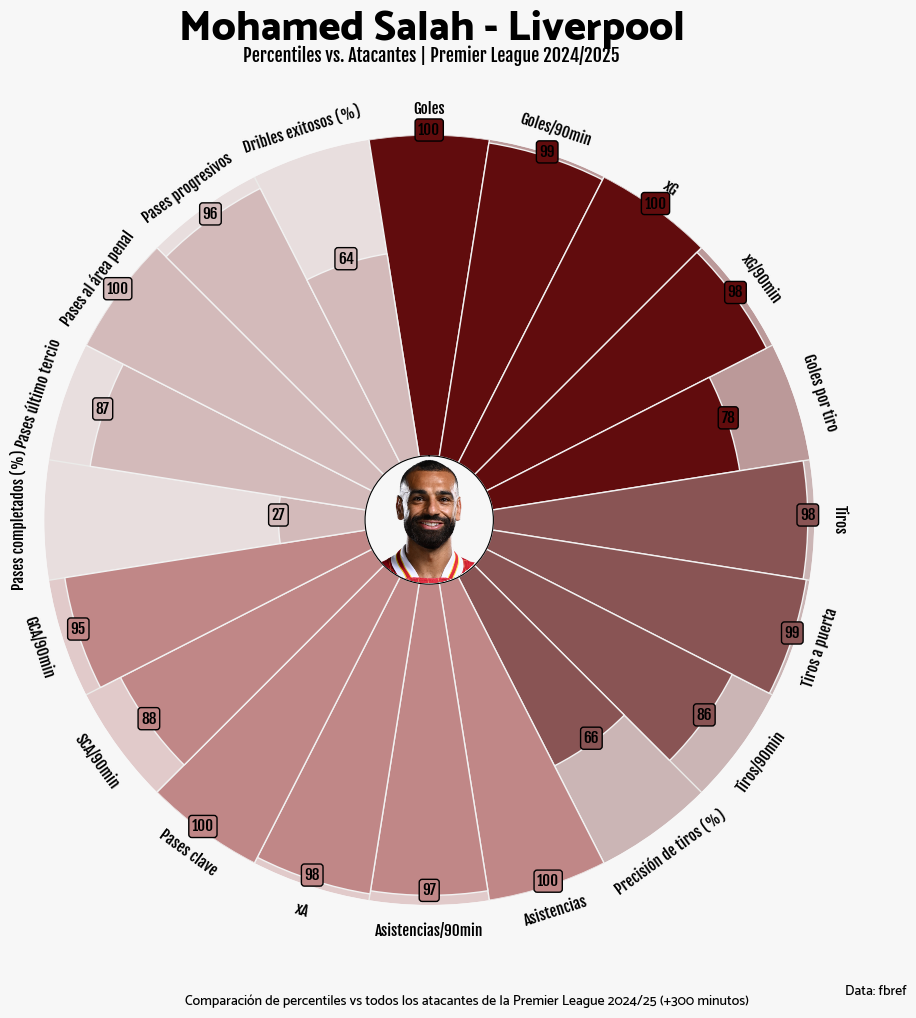

In [ ]:
mask = Image.new("L", fdj.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((0, 0, fdj.size[0], fdj.size[1]), fill=255)

# color for the slices and text
slice_colors = ["#610C0D"] * 5 + ["#895454"] * 4 + ['#C08787'] * 6 + ["#D3BABA"] * 5
text_colors = ["#000000"] * 20

fdj_cropped = Image.new("RGBA", fdj.size)
fdj_cropped.paste(fdj, (0, 0), mask=mask)

baker = PyPizza(
    params=parametros,
    background_color="#f7f7f7",
    straight_line_color="#EBEBE9",
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_lw=0,
    inner_circle_size=20
)


fig, ax = baker.make_pizza(
    values,
    figsize=(10, 10),
    color_blank_space="same",
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    blank_alpha=0.4,
    kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),
    kwargs_params=dict(color="#000000", fontsize=11,
                       fontproperties=robotto_regular.prop, va="center"),
    kwargs_values=dict(color="#000000", fontsize=11,
                       fontproperties=robotto_regular.prop, zorder=3,
                       bbox=dict(edgecolor="#000000", facecolor="cornflowerblue",
                                 boxstyle="round,pad=0.2", lw=1))
)

zoom = 0.18
imagebox = OffsetImage(fdj_cropped, zoom=zoom)
ab = AnnotationBbox(
    imagebox,
    (0.428, 0.497),
    frameon=False,
    xycoords='figure fraction',
    box_alignment=(0.5, 0.5)
)
fig.add_artist(ab)

fig.text(
    0.515, 0.975, "Mohamed Salah - Liverpool", size=30,
    ha="center", fontproperties=catamaran.prop, color="#000000"
)

fig.text(
    0.515, 0.953,
    "Percentiles vs. Atacantes | Premier League 2024/2025",
    size=13,
    ha="center", fontproperties=robotto_regular.prop, color="#000000"
)

CREDIT_1 = "Data: fbref"
Mensaje = "Comparación de percentiles vs todos los atacantes de la Premier League 2024/25 (+300 minutos)"

fig.text(
    0.99, 0.02, f"{CREDIT_1}", size=10,
    fontproperties=catamaran2.prop, color="#000000",
    ha="right"
)
fig.text(
    0.55, 0.01,  # 0.5 = centro horizontal, 0.01 = muy abajo
    f"{Mensaje}",
    size=10,
    fontproperties=catamaran2.prop,
    color="#000000",
    ha="center"
)


plt.show()
fig.savefig("salah_pizza.png", dpi=300, bbox_inches="tight", transparent=True)

Percentiles en grafico

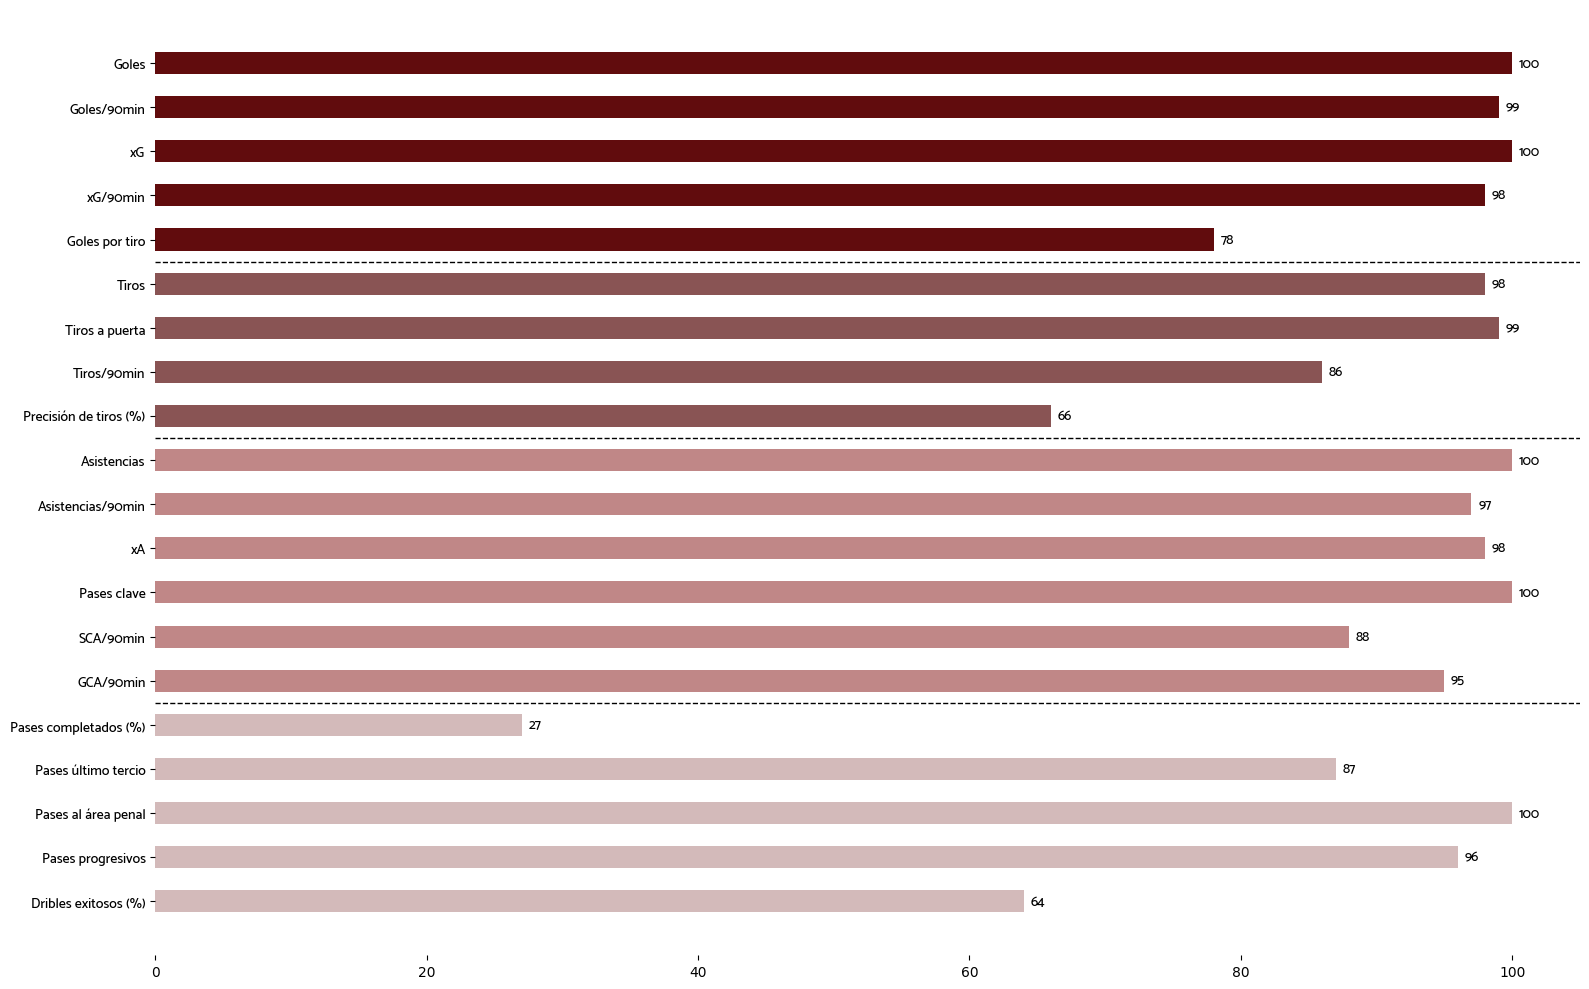

In [ ]:
colores =["#610C0D"] * 5 + ["#895454"] * 4 + ['#C08787'] * 6 + ["#D3BABA"] * 5
fig, ax = plt.subplots(figsize=(16, 10))
bars = ax.barh(parametros, values, color=colores, height=0.5)  # Puedes cambiar el color o usar degradé

# Invertimos el eje y para que la primera etiqueta quede arriba
ax.invert_yaxis()

# Añadimos los valores al final de cada barra
for i, v in enumerate(values):
    ax.text(v + 0.5, i, str(v), va='center', fontproperties=catamaran2.prop, color="#000000")

# Líneas divisorias después de la 5ta, 9na y 15va barra
for pos in [4, 8, 14]:
    ax.axhline(y=pos + 0.5, color='black', linestyle='--', linewidth=1)

for spine in ax.spines.values():
    spine.set_visible(False)

#ax.set_title("Perfil de Percentiles - Mohamed Salah")
ax.set_yticklabels(parametros, fontproperties=catamaran2.prop)
plt.tight_layout()
plt.show()

fig.savefig("perfil_percentiles_salah.png", transparent=True)

## Comparacion vs 4

In [ ]:
destacados = ['Mohamed Salah', 'Bukayo Saka', 'Alexander Isak', 'Cole Palmer']

tabla_v4 = infojugador[infojugador['Jugador'].isin(destacados)].copy()

tabla_v4.reset_index(drop=True, inplace=True)
tabla_v4 = tabla_v4[['Jugador','Nación','Edad','Posición','Goles','Asistencias','Pases completados (%)','xG']]
tabla_v4 = tabla_v4.T.reset_index()
tabla_v4.columns = tabla_v4.iloc[0]
tabla_v4 = tabla_v4[1:]
tabla_v4.reset_index(drop=True, inplace=True)
tabla_v4

#tabla_v4.to_csv("tabla_v4.csv", index=False, encoding="utf-8")

,Jugador,Alexander Isak,Bukayo Saka,Cole Palmer,Mohamed Salah
0,Nación,se SWE,eng ENG,eng ENG,eg EGY
1,Edad,24,22,22,32
2,Posición,Delantero,Delantero/Mediocampista,Mediocampista/Delantero,Delantero
3,Goles,23,6,15,29
4,Asistencias,6,10,8,18
5,Pases completados (%),75.3,75.5,77.0,70.6
6,xG,20.3,6.8,17.3,25.2


### Matriz vs 4

In [ ]:
infojugador.columns

Index(['Jugador', 'Edad', 'Asistencias', 'Asistencias/90min', 'Goles',
       'Goles/90min', 'Nación', 'Posición', 'Equipo', 'xAG', 'xAG/90min', 'xG',
       'xG/90min', 'Tiros', 'Tiros a puerta', 'Precisión de tiros (%)',
       'Tiros/90min', 'Tiros a puerta/90min', 'Goles por tiro',
       'Goles por tiro a puerta', 'Pases completados (%)', 'Cmp%_1', 'Cmp%_2',
       'Cmp%_3', 'xA', 'Asistencias - xAG', 'Pases clave',
       'Pases último tercio', 'Pases al área penal', 'Centros al área penal',
       'Pases progresivos', 'SCA', 'SCA/90min', 'GCA', 'GCA/90min',
       'Dribles exitosos (%)'],
      dtype='object')

In [ ]:
matriz_vs_4 = infojugador[['Jugador', 'Goles', 'Goles/90min','Asistencias', 'Asistencias/90min','Dribles exitosos (%)', 'Pases clave', 'Pases progresivos', 'xAG','SCA/90min','GCA/90min']]
matriz_vs_4 = matriz_vs_4[matriz_vs_4['Jugador'].isin(destacados)]
matriz_vs_4 = matriz_vs_4.set_index("Jugador").loc[destacados].reset_index()
matriz_vs_4.reset_index(drop=True, inplace=True)
matriz_vs_4

,Jugador,Goles,Goles/90min,Asistencias,Asistencias/90min,Dribles exitosos (%),Pases clave,Pases progresivos,xAG,SCA/90min,GCA/90min
0,Mohamed Salah,29,0.77,18,0.48,42.3,88,144,14.2,4.51,0.72
1,Bukayo Saka,6,0.31,10,0.52,45.6,58,70,7.6,6.09,1.20
2,Alexander Isak,23,0.75,6,0.20,46.2,41,88,4.3,3.01,0.46
3,Cole Palmer,15,0.42,8,0.23,45.1,87,214,10.9,5.70,0.42


In [ ]:
def rank_and_color(series, higher_is_better=True):
    # Ordena los valores (descendente si más alto es mejor)
    order = series.rank(method="min", ascending=not higher_is_better)
    # Colores según ranking
    color_map = {1: "#91cf60", 2: "#fee08b", 3: "#fc8d59", 4: "#d73027"}
    return [color_map[int(o)] for o in order]

colors_matriz = {}
for col in ['Goles', 'Goles/90min', 'Asistencias', 'Asistencias/90min',
       'Dribles exitosos (%)', 'Pases clave', 'Pases progresivos', 'xAG',
       'SCA/90min', 'GCA/90min']:
    colors_matriz[col] = rank_and_color(matriz_vs_4[col], higher_is_better=True)

In [ ]:
metrics = ['Goles', 'Goles/90min', 'Asistencias', 'Asistencias/90min',
           'Dribles exitosos (%)', 'Pases clave', 'Pases progresivos', 'xAG',
           'SCA/90min', 'GCA/90min']

imagenes_jugadores = {
    "Mohamed Salah": "salah.png",
    "Bukayo Saka": "saka.png",
    "Alexander Isak": "isak.png",
    "Cole Palmer": "palmer.png"
}


In [ ]:
def preparar_imagen_cover(path, size=(300, 300), borde=8, color_borde="#610c0d"):
    img = Image.open(path).convert("RGBA")

    # Recorte tipo cover (rellena todo el cuadro sin dejar bordes blancos)
    img = ImageOps.fit(img, size, method=Image.Resampling.LANCZOS, centering=(0.5, 0.5))

    # Agregar borde
    img_con_borde = ImageOps.expand(img, border=borde, fill=color_borde)

    return img_con_borde

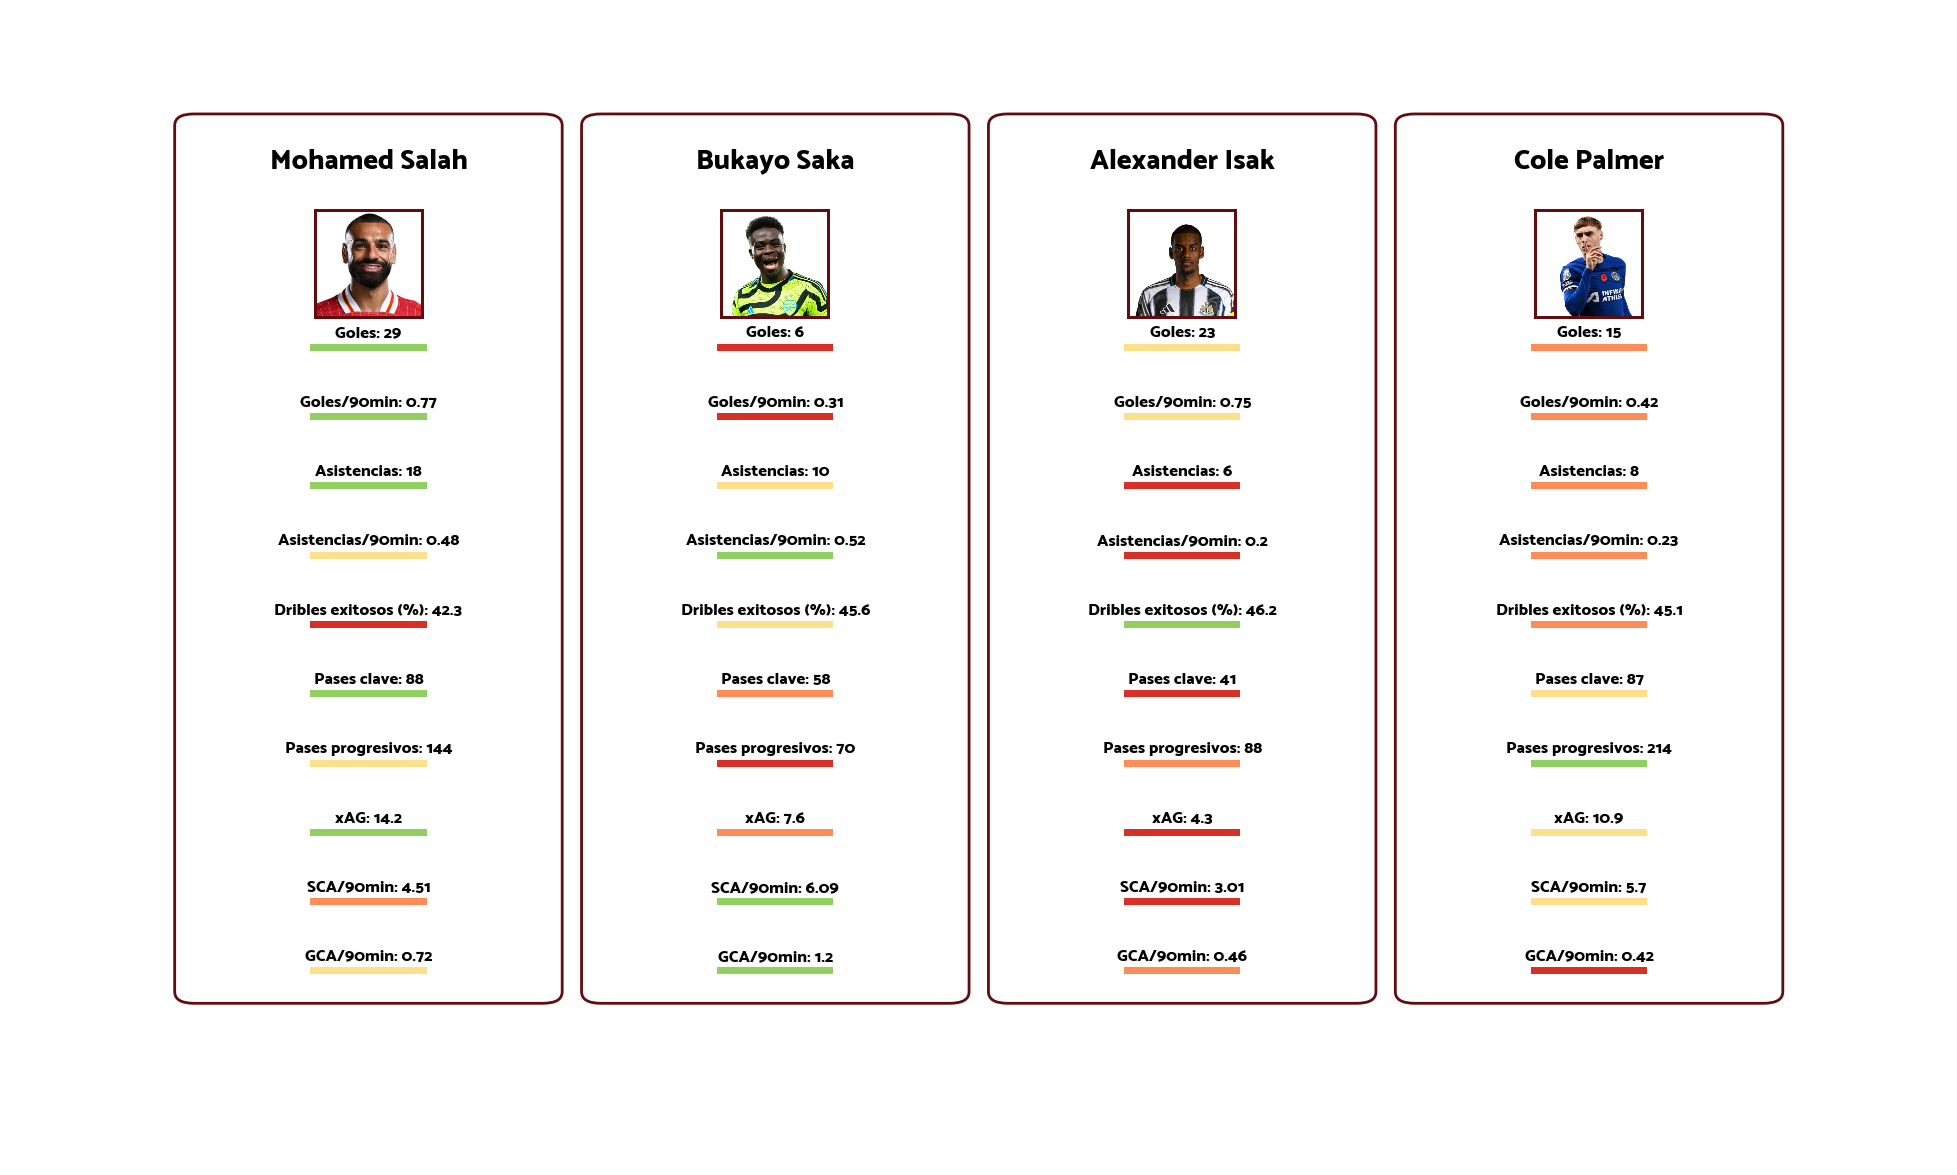

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
ax.axis("off")

num_jugadores = len(matriz_vs_4)
width = 0.18
x_gap = 0.03
total_width = num_jugadores*width + (num_jugadores-1)*x_gap
x_start = (1 - total_width)/2

y_start = 0.9
height_per_metric = 0.06
image_height = 0.12

for i, (idx, row) in enumerate(matriz_vs_4.iterrows()):
    x0 = x_start + i*(width + x_gap)
    height = height_per_metric * len(metrics) + image_height + 0.03

    bbox = FancyBboxPatch((x0, y_start - height), width, height,
                          boxstyle="round,pad=0.01",
                          edgecolor="#610c0d",
                          facecolor="None",
                          linewidth=2)
    ax.add_patch(bbox)

    ax.text(x0 + width/2, y_start - 0.02, row["Jugador"],
            fontsize=20, weight="bold", ha="center", va="top", fontproperties=catamaran.prop)

    if row["Jugador"] in imagenes_jugadores:
      img = preparar_imagen_cover(imagenes_jugadores[row["Jugador"]], size=(300, 300))
      im = OffsetImage(img, zoom=0.25)
      ab = AnnotationBbox(im, (x0 + width/2, y_start - 0.12), frameon=False)
      ax.add_artist(ab)

    for j, metric in enumerate(metrics):
        value = row[metric]
        color = colors_matriz[metric][i]

        y_text = y_start - 0.18 - j*height_per_metric
        x_text = x0 + width/2

        ax.text(x_text, y_text, f"{metric}: {value}",
                fontsize=12, ha="center", va="center", fontproperties=catamaran.prop)

        rect = Rectangle((x_text - 0.03, y_text - 0.015), 0.06, 0.006,
                         facecolor=color, edgecolor=None)
        ax.add_patch(rect)

plt.show()
fig.savefig("Matriz_de_comparacion.png", dpi=300, bbox_inches="tight", transparent=True)

## Scatter plots

In [ ]:
colores_destacados = ['#610C0D', '#9C824A', '#457B9D', '#153D8A']
infojugador['color'] = 'lightgray'
for jugador, color in zip(destacados, colores_destacados):
    infojugador.loc[infojugador['Jugador'] == jugador, 'color'] = color

### xG/90 vs xAG/90

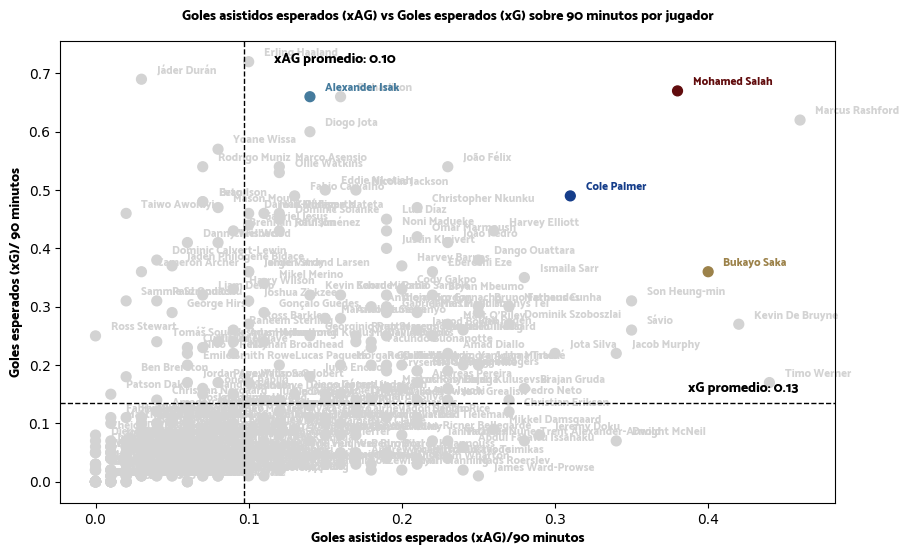

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(infojugador['xAG/90min'], infojugador['xG/90min'],
           c=infojugador['color'], s=50)

for _, row in infojugador.iterrows():
    if row['Jugador'] in destacados:
        z = 4  # encima
    else:
        z = 2  # debajo

    ax.text(
        row['xAG/90min'] + 0.01,
        row['xG/90min'] + 0.01,
        row['Jugador'],
        fontsize=8,
        fontproperties=catamaran.prop,
        color=row['color'],
        zorder=z
        )

x_promedio = infojugador['xAG/90min'].mean()
y_promedio = infojugador['xG/90min'].mean()

ax.axvline(x=x_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    x_promedio + 0.02,
    ax.get_ylim()[1]*0.95,
    f"xAG promedio: {x_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    zorder=5
)

ax.axhline(y=y_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    ax.get_xlim()[1]*0.95,
    y_promedio + 0.02,
    f"xG promedio: {y_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    ha='right',
    zorder=5
)

# Etiquetas invertidas
ax.set_xlabel('Goles asistidos esperados (xAG)/90 minutos', fontproperties=catamaran.prop, color="#000000")
ax.set_ylabel('Goles esperados (xG)/ 90 minutos', fontproperties=catamaran.prop, color="#000000")
ax.set_title('Goles asistidos esperados (xAG) vs Goles esperados (xG) sobre 90 minutos por jugador', fontproperties=catamaran.prop, color="#000000", pad=15)

plt.show()
fig.savefig("xAG_vs_xGS90min.png", dpi=300, bbox_inches="tight", transparent=True)

### Goles/90min vs Tiros a puerta/90min

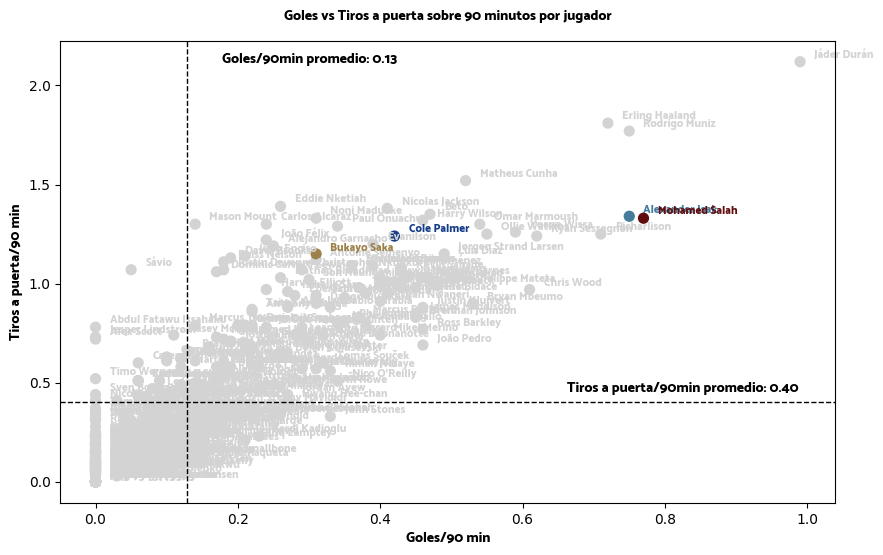

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(infojugador['Goles/90min'], infojugador['Tiros a puerta/90min'],
  c=infojugador['color'], s=50)

for _, row in infojugador.iterrows():
    if row['Jugador'] in destacados:
        z = 4  # encima
    else:
        z = 2  # debajo

    ax.text(
        row['Goles/90min'] + 0.02,
        row['Tiros a puerta/90min'] + 0.02,
        row['Jugador'],
        fontsize=8,
        fontproperties=catamaran.prop,
        color=row['color'],
        zorder=z
    )

x_promedio = infojugador['Goles/90min'].mean()
y_promedio = infojugador['Tiros a puerta/90min'].mean()

ax.axvline(x=x_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.axhline(y=y_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)

ax.text(
    x_promedio + 0.05,
    ax.get_ylim()[1]*0.95,
    f"Goles/90min promedio: {x_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    zorder=4
)
ax.text(
    ax.get_xlim()[1]*0.95,
    y_promedio + 0.05,
    f"Tiros a puerta/90min promedio: {y_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    ha='right',
    zorder=4
)


ax.set_xlabel('Goles/90 min', fontproperties=catamaran.prop, color="#000000")
ax.set_ylabel('Tiros a puerta/90 min', fontproperties=catamaran.prop, color="#000000")
ax.set_title('Goles vs Tiros a puerta sobre 90 minutos por jugador',
             fontproperties=catamaran.prop, color="#000000", pad=15)

plt.show()
fig.savefig("Goles_vs_Tiros_a_puertaS90min.png", dpi=300, bbox_inches="tight", transparent=True)

### Pases progresivos vs GCA

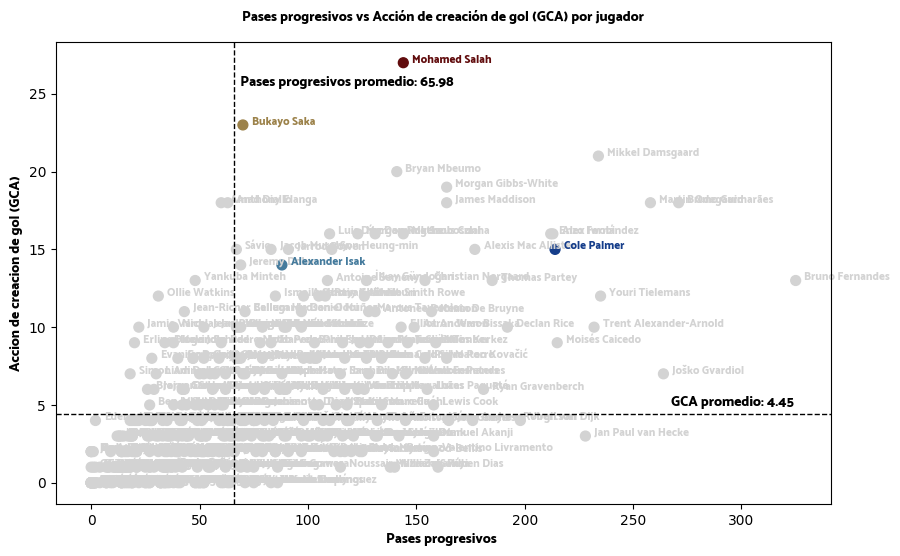

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(infojugador['Pases progresivos'], infojugador['GCA'], c=infojugador['color'], s=50)

for _, row in infojugador.iterrows():
    if row['Jugador'] in destacados:
        z = 4
    else:
        z = 2

    ax.text(
        row['Pases progresivos'] + 4,
        row['GCA'] + 0.02,
        row['Jugador'],
        fontsize=8,
        fontproperties=catamaran.prop,
        color=row['color'],
        zorder=z
    )

x_promedio = infojugador['Pases progresivos'].mean()
y_promedio = infojugador['GCA'].mean()

ax.axvline(x=x_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    x_promedio + 0.05,
    ax.get_ylim()[1]*0.9,
    f"  Pases progresivos promedio: {x_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    zorder=4
)

ax.axhline(y=y_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    ax.get_xlim()[1]*0.95,
    y_promedio + 0.5,
    f"GCA promedio: {y_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    ha='right',
    zorder=4
)

ax.set_xlabel('Pases progresivos ', fontproperties=catamaran.prop, color="#000000")
ax.set_ylabel('Accion de creacion de gol (GCA)', fontproperties=catamaran.prop, color="#000000")
ax.set_title('Pases progresivos vs Acción de creación de gol (GCA) por jugador', fontproperties=catamaran.prop, color="#000000", pad=15)

plt.show()
fig.savefig("Pases_progresivos_vs_GCA.png", dpi=300, bbox_inches="tight", transparent=True)

### Pases Clave vs xAG

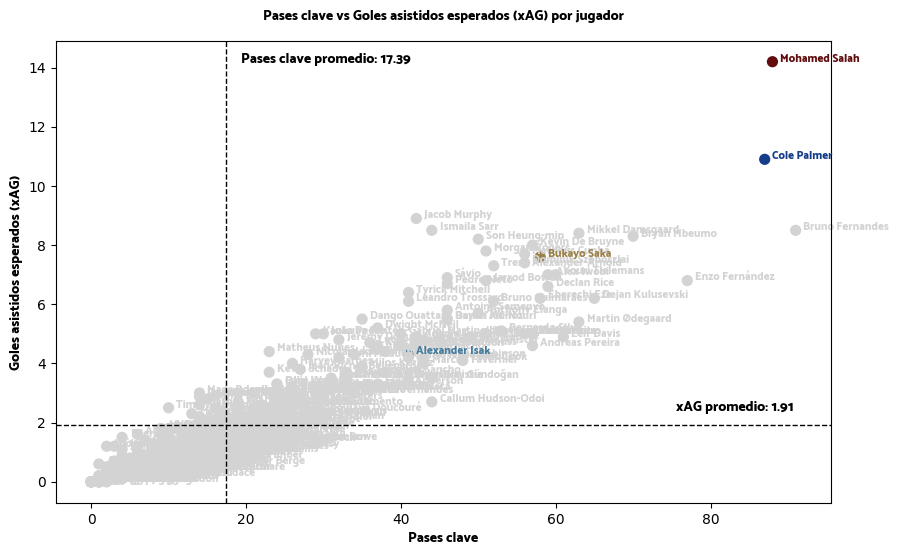

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(infojugador['Pases clave'], infojugador['xAG'],
           c=infojugador['color'], s=50)

for _, row in infojugador.iterrows():
    if row['Jugador'] in destacados:
        z = 4
    else:
        z = 2

    ax.text(
        row['Pases clave'] + 1,
        row['xAG'] + 0.01,
        row['Jugador'],
        fontsize=8,
        fontproperties=catamaran.prop,
        color=row['color'],
        zorder=z
    )

x_promedio = infojugador['Pases clave'].mean()
y_promedio = infojugador['xAG'].mean()

ax.axvline(x=x_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    x_promedio + 2,
    ax.get_ylim()[1]*0.95,
    f"Pases clave promedio: {x_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    zorder=5
)

ax.axhline(y=y_promedio, color='#000000', linestyle='--', linewidth=1, zorder=5)
ax.text(
    ax.get_xlim()[1]*0.95,
    y_promedio + 0.5,
    f"xAG promedio: {y_promedio:.2f}",
    color="#000000",
    fontproperties=catamaran.prop,
    ha='right',
    zorder=5
)


ax.set_xlabel('Pases clave', fontproperties=catamaran.prop, color="#000000")
ax.set_ylabel('Goles asistidos esperados (xAG)', fontproperties=catamaran.prop, color="#000000")
ax.set_title('Pases clave vs Goles asistidos esperados (xAG) por jugador', fontproperties=catamaran.prop, color="#000000", pad=15)

plt.show()
fig.savefig("PasesClave_vs_xAG.png", dpi=300, bbox_inches="tight", transparent=True)


## Grafico dispersion


In [ ]:
atacantes = infojugador[
    infojugador['Posición'].str.contains(r"(?i)delantero", na=False)
]


def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

def color_quantiles(series):
    quantiles = np.percentile(series, [25, 50, 75])
    colors = []
    for v in series:
        if v <= quantiles[0]:
            colors.append("#d73027")
        elif v <= quantiles[1]:
            colors.append("#fc8d59")
        elif v <= quantiles[2]:
            colors.append("#fee08b")
        else:
            colors.append("#91cf60")
    return colors


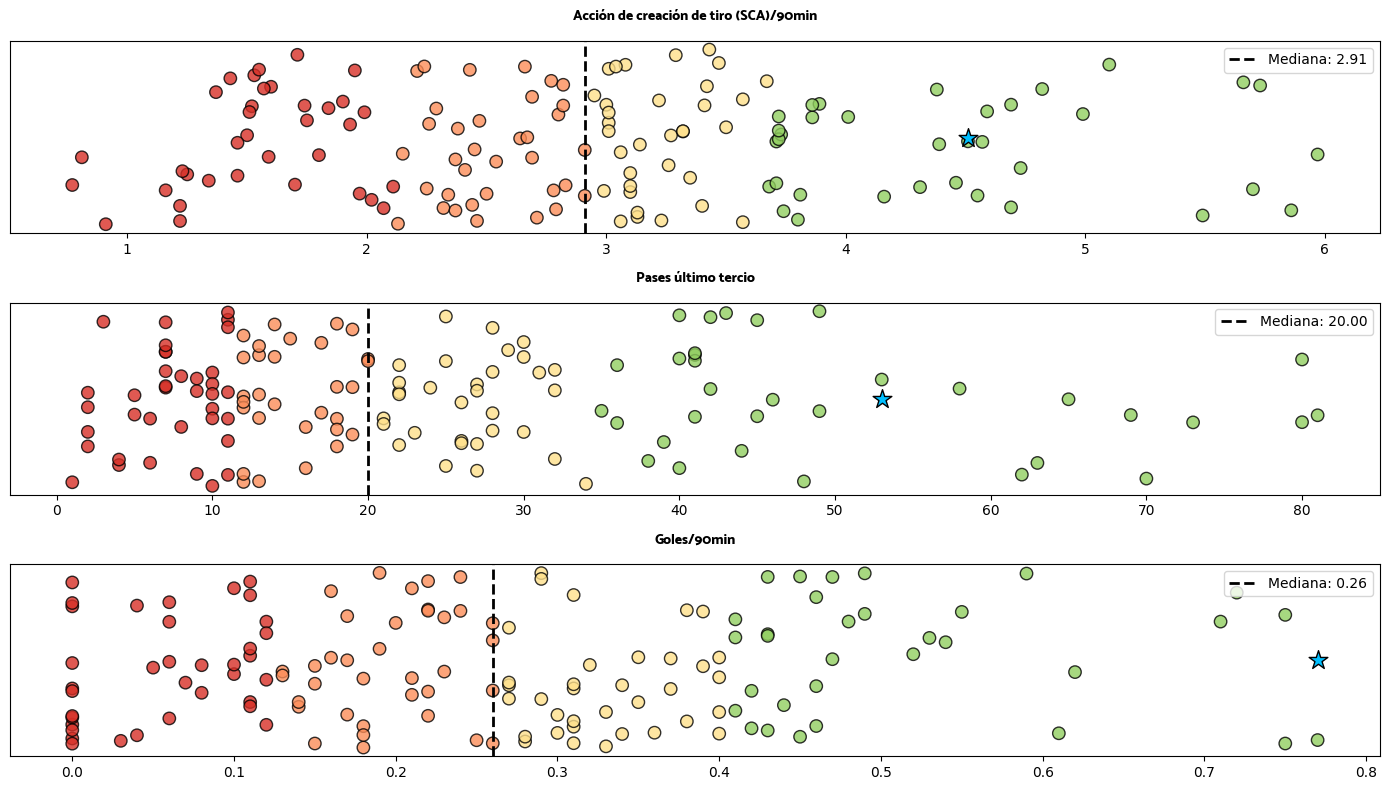

In [ ]:
metrics = {
    "Acción de creación de tiro (SCA)/90min": "SCA/90min",
    "Pases último tercio": "Pases último tercio",
    'Goles/90min': 'Goles/90min'
}

fig, axes = plt.subplots(3, 1, figsize=(14, 8))
highlight_player = "Mohamed Salah"

for ax, (title, col) in zip(axes, metrics.items()):

    atacantes_clean = remove_outliers_iqr(atacantes, col)
    colors = color_quantiles(atacantes_clean[col])
    y_jitter = np.random.uniform(-0.00001, 0.00001, size=len(atacantes_clean))
    ax.scatter(atacantes_clean[col], y_jitter, c=colors, s=80, edgecolor="black", alpha=0.8)
    jugador_row = atacantes_clean[atacantes_clean["Jugador"] == highlight_player]
    if not jugador_row.empty:
        ax.scatter(jugador_row[col], [0],
                   s=200, c="deepskyblue", edgecolor="black", marker="*", zorder=3)

    mediana = atacantes_clean[col].median()
    ax.axvline(mediana, color='#000000', linestyle='--', linewidth=2, label=f"Mediana: {mediana:.2f}")
    ax.legend()

    ax.set_title(title, fontsize=14, weight="bold", fontproperties=catamaran.prop, pad= 15)
    ax.set_yticks([])

plt.tight_layout()
plt.show()
fig.savefig("SCAS90_Pases_Ultimo_Tercio_GolesS90.png", dpi=300, bbox_inches="tight", transparent=True)

## Box-plot

In [ ]:
uploaded = files.upload()
todos_los_partidos = []

for filename in uploaded.keys():
    print(f"Procesando archivo: {filename}")

    with open(filename, "r", encoding="utf-8") as f:
        html = f.read()

    html = html.replace("<!--", "").replace("-->", "")
    soup = BeautifulSoup(html, "html.parser")

    table = soup.find("table", {"id": "matchlogs_all"})
    df = pd.read_html(StringIO(str(table)), header=1)[0]
    player_name = os.path.splitext(filename)[0]
    df["Player"] = player_name
    columnas_requeridas = ["Player", "Comp", "npxG","xAG" ,"SCA" ,"PrgP"]
    columnas_en_df = [col for col in columnas_requeridas if col in df.columns]
    df_filtrado = df[columnas_en_df].copy()
    todos_los_partidos.append(df_filtrado)

df_todos = pd.concat(todos_los_partidos, ignore_index=True)
df_premier = df_todos[df_todos["Comp"] == "Premier League"].copy()
df_premier.reset_index(drop=True, inplace=True)

print("✅ Todos los partidos combinados:")
display(df_todos.head())
print("✅ Solo Premier League:")
display(df_premier.head())


Saving Alexander Isak Match Stats.html to Alexander Isak Match Stats (1).html
Saving Bukayo Saka Match Stats.html to Bukayo Saka Match Stats (1).html
Saving Cole Palmer Match Stats.com.html to Cole Palmer Match Stats.com (1).html
Saving Mohamed Salah Match Stats.html to Mohamed Salah Match Stats (1).html
Procesando archivo: Alexander Isak Match Stats (1).html
Procesando archivo: Bukayo Saka Match Stats (1).html
Procesando archivo: Cole Palmer Match Stats.com (1).html
Procesando archivo: Mohamed Salah Match Stats (1).html
✅ Todos los partidos combinados:


,Player,Comp,npxG,xAG,SCA,PrgP
0,Alexander Isak Match Stats (1),Premier League,0.0,0.2,2.0,1.0
1,Alexander Isak Match Stats (1),Premier League,0.3,0.2,2.0,1.0
2,Alexander Isak Match Stats (1),EFL Cup,NaN,NaN,NaN,NaN
3,Alexander Isak Match Stats (1),Premier League,1.0,0.0,2.0,0.0
4,Alexander Isak Match Stats (1),UEFA Nations League,NaN,NaN,NaN,NaN


✅ Solo Premier League:


,Player,Comp,npxG,xAG,SCA,PrgP
0,Alexander Isak Match Stats (1),Premier League,0.0,0.2,2.0,1.0
1,Alexander Isak Match Stats (1),Premier League,0.3,0.2,2.0,1.0
2,Alexander Isak Match Stats (1),Premier League,1.0,0.0,2.0,0.0
3,Alexander Isak Match Stats (1),Premier League,0.1,0.1,1.0,1.0
4,Alexander Isak Match Stats (1),Premier League,0.1,0.0,4.0,1.0


In [ ]:
df_premier = df_premier.astype({
    'Player': 'string',
    'Comp': 'string',
    'npxG': 'float64',
    'xAG': 'float64',
    'SCA': 'float64',
    'PrgP': 'float64',
})
df_premier = df_premier.astype({
    'SCA': 'Int64',
    'PrgP': 'Int64'
})
df_premier["Player"] = df_premier["Player"].apply(
    lambda x: " ".join(x.split()[:2])
)

In [ ]:
colores_jugadores = {
    "Mohamed Salah": "#610C0D",
    "Bukayo Saka": "#9C824A",
    "Alexander Isak": "#457B9D",
    "Cole Palmer": "#153D8A",
}

SCA BOXPLOT

In [ ]:
orden = df_premier.groupby("Player")["SCA"].median().sort_values(ascending=False).index

fig = px.violin(
    df_premier,
    x="Player",
    y="SCA",
    category_orders={"Player": orden},
    box=True,
    points="all",
    title="Distribución de SCA por jugador (Top 4 de Premier League)",
    labels={"SCA": "SCA: Acción de creación de tiro", "Player": "Top 4"},
    color="Player",
    color_discrete_map=colores_jugadores
)

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="catamaran",
        size=14,
        color="black"
    ),
    xaxis=dict(
        gridcolor='rgba(0,0,0,0.1)'
    ),
    yaxis=dict(
        gridcolor='rgba(0,0,0,0.1)'
    )
)

fig.show()

npxG

In [ ]:
orden = df_premier.groupby("Player")["npxG"].median().sort_values(ascending=False).index

fig = px.violin(
    df_premier,
    x="Player",
    y="npxG",
    category_orders={"Player": orden},
    box=True,
    points="all",
    title="Distribución de npxG por jugador (Top 4 de Premier League)",
    labels={"npxG": "npxG: Goles esperados (sin penales)", "Player": "Top 4"},
    color="Player",
    color_discrete_map=colores_jugadores
)

max_npxg = df_premier["npxG"].max()
tick_vals = [x * 0.5 for x in range(0, int(max_npxg * 2) + 2)]

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="catamaran",
        size=14,
        color="black"
    ),
    xaxis=dict(
        gridcolor='rgba(0,0,0,0.1)'
    ),
    yaxis=dict(
        gridcolor='rgba(0,0,0,0.1)',
        tickvals=tick_vals,
        ticktext=[str(v) for v in tick_vals]
    )
)

fig.show()

Pases Progresivos

In [ ]:
orden = df_premier.groupby("Player")["PrgP"].median().sort_values(ascending=False).index

fig = px.violin(
    df_premier,
    x="Player",
    y="PrgP",
    category_orders={"Player": orden},
    box=True,
    points="all",
    title="Distribución de pases progresivos por jugador (Top 4 de Premier League)",
    labels={"PrgP": "Pases Progresivos", "Player": "Top 4"},
    color="Player",
    color_discrete_map=colores_jugadores
)


fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="catamaran",
        size=14,
        color="black"
    ),
    xaxis=dict(
        gridcolor='rgba(0,0,0,0.1)'
    ),
    yaxis=dict(
        gridcolor='rgba(0,0,0,0.1)',
    )
)

fig.show()

xAG

In [ ]:
orden = df_premier.groupby("Player")["xAG"].median().sort_values(ascending=False).index

fig = px.violin(
    df_premier,
    x="Player",
    y="xAG",
    category_orders={"Player": orden},
    box=True,
    points="all",
    title="Distribución de xAG por jugador (Top 4 de Premier League)",
    labels={"xAG": "xAG: Goles esperados asistidos", "Player": "Top 4"},
    color="Player",
    color_discrete_map=colores_jugadores
)


fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="catamaran",
        size=14,
        color="black"
    ),
    xaxis=dict(
        gridcolor='rgba(0,0,0,0.1)'
    ),
    yaxis=dict(
        gridcolor='rgba(0,0,0,0.1)',
    )
)

fig.show()

## Partido vs

### Info gral

In [ ]:
salah_partido = fbref.get_general_match_team_stats("https://fbref.com/en/matches/1e1cea4c/Tottenham-Hotspur-Liverpool-December-22-2024-Premier-League")
salah_partido = salah_partido[1]
if isinstance(salah_partido.columns, pd.MultiIndex):
    salah_partido.columns = [col[-1] for col in salah_partido.columns]

In [ ]:
salah_partido = salah_partido[salah_partido['Player'] == 'Mohamed Salah']
salah_partido.reset_index(drop=True, inplace=True)
salah_partido

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att,Succ
0,Mohamed Salah,11.0,eg EGY,RW,32-190,86,2,2,0,0,...,7,2,10,15,66.7,5,22,2,4,1


In [ ]:
salah_partido.columns

Index(['Player', '#', 'Nation', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'PK',
       'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks',
       'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP',
       'Carries', 'PrgC', 'Att', 'Succ'],
      dtype='object')

In [ ]:
salah_partido = salah_partido[['Player', 'Min', 'Gls', 'Ast', 'Sh', 'SoT','xG', 'npxG', 'xAG', 'SCA', 'Cmp%', 'PrgP']]
salah_partido

,Player,Min,Gls,Ast,Sh,SoT,xG,npxG,xAG,SCA,Cmp%,PrgP
0,Mohamed Salah,86,2,2,7,3,2.4,2.4,1.1,7,66.7,5


### Mapa de calor

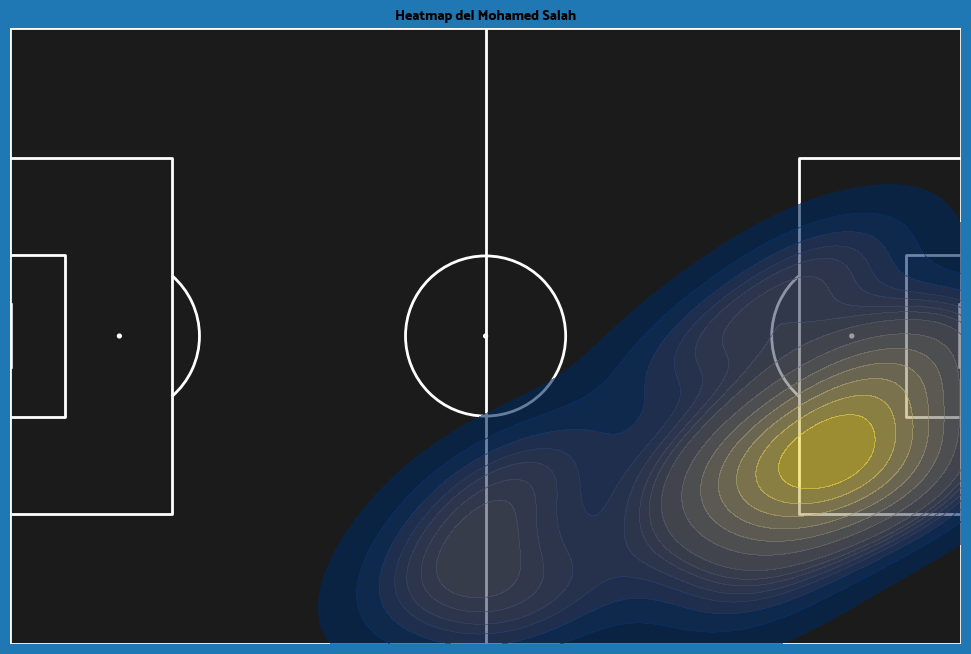

In [ ]:
#url = "https://www.sofascore.com/api/v1/event/12436471/player/159665/heatmap"
data_mapacalor = {
    "heatmap":[
        {"x":73,"y":49},{"x":86,"y":62},{"x":85,"y":62},{"x":87,"y":28},
        {"x":88,"y":29},{"x":95,"y":43},{"x":47,"y":18},{"x":90,"y":43},
        {"x":88,"y":40},{"x":90,"y":38},{"x":90,"y":36},{"x":80,"y":31},
        {"x":95,"y":25},{"x":94,"y":24},{"x":92,"y":29},{"x":75,"y":49},
        {"x":75,"y":27},{"x":79,"y":7},{"x":87,"y":26},{"x":96,"y":49},
        {"x":89,"y":27},{"x":78,"y":34},{"x":57,"y":5},{"x":90,"y":50},
        {"x":53,"y":6},{"x":47,"y":12},{"x":48,"y":10},{"x":54,"y":30},
        {"x":52,"y":26},{"x":78,"y":22},{"x":80,"y":25},{"x":78,"y":13},
        {"x":78,"y":33}
    ]
}

data_mapacalor = pd.DataFrame(data_mapacalor['heatmap'])

# Crear figura y eje
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor(None)
ax.patch.set_facecolor(None)

# Crear pitch tipo Opta
pitch = Pitch(pitch_type='opta', pitch_color="#1b1b1b", line_color='white')
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

sns.kdeplot(
    x=data_mapacalor['x'],
    y=data_mapacalor['y'],
    fill=True,
    alpha=0.6,
    levels=15,
    cmap='cividis',
    ax=ax
)

plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Heatmap del Mohamed Salah', color='#000000', size=20, fontproperties=catamaran.prop)
plt.savefig('heatmap_salah.png', dpi=300, bbox_inches='tight')
plt.show()

## Disparos al arco

In [ ]:
url = "https://understat.com/player/1250"
resp = requests.get(url)

pattern_script = r"shotsData\s*=\s*JSON\.parse\('(.+?)'\);"
match = re.search(pattern_script, resp.text, re.DOTALL)
if not match:
    raise ValueError("No se encontró shotsData en la página")

data_str = match.group(1).encode('utf-8').decode('unicode_escape')
data_str = data_str.replace(r"\'", "'")

object_pattern = r"\{.*?\}"
shots_list = re.findall(object_pattern, data_str)

shots = [json.loads(obj) for obj in shots_list]

df_shots = pd.DataFrame(shots)
print(df_shots.head())
print(f"Total de tiros: {len(df_shots)}")


      id minute       result                   X                    Y  \
0  15217     92  MissedShots  0.8230000305175781  0.36900001525878906   
1  20034     84    SavedShot                0.92   0.5320000076293945   
2  46908     87  BlockedShot  0.8859999847412109   0.5659999847412109   
3  47192      0    SavedShot  0.9640000152587891   0.6880000305175781   
4  47197     16  MissedShots                 0.9   0.6769999694824219   

                     xG         player h_a player_id situation  ... match_id  \
0    0.0623646005988121  Mohamed Salah   h      1250  OpenPlay  ...     4720   
1    0.4399380087852478  Mohamed Salah   a      1250  OpenPlay  ...     4560   
2   0.09675999730825424  Mohamed Salah   h      1250  OpenPlay  ...     4929   
3  0.049131400883197784  Mohamed Salah   a      1250  OpenPlay  ...     4937   
4   0.06032019853591919  Mohamed Salah   a      1250  OpenPlay  ...     4937   

       h_team      a_team h_goals a_goals                 date  \
0     Chelsea 

In [ ]:
df_shots["season"] = df_shots["season"].astype(float)
df_shots = df_shots[df_shots["season"] == 2024]
df_shots.reset_index(drop=True, inplace=True)

In [ ]:
df_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,name,fid
0,584693,46,BlockedShot,0.874000015258789,0.33799999237060546,0.0402679517865181,Mohamed Salah,a,1250,FromCorner,...,26603,Ipswich,Liverpool,0,2,2024-08-17 11:30:00,Luis Díaz,Pass,NaN,NaN
1,584700,64,Goal,0.9369999694824219,0.4490000152587891,0.5713244676589966,Mohamed Salah,a,1250,OpenPlay,...,26603,Ipswich,Liverpool,0,2,2024-08-17 11:30:00,None,None,NaN,NaN
2,584702,70,SavedShot,0.8369999694824218,0.5629999923706055,0.40319985151290894,Mohamed Salah,a,1250,OpenPlay,...,26603,Ipswich,Liverpool,0,2,2024-08-17 11:30:00,Dominik Szoboszlai,Throughball,NaN,NaN
3,584707,93,SavedShot,0.9309999847412109,0.34700000762939454,0.08194273710250854,Mohamed Salah,a,1250,OpenPlay,...,26603,Ipswich,Liverpool,0,2,2024-08-17 11:30:00,None,None,NaN,NaN
4,586849,20,MissedShots,0.8819999694824219,0.3139999961853027,0.06441381573677063,Mohamed Salah,h,1250,OpenPlay,...,26621,Liverpool,Brentford,2,0,2024-08-25 15:30:00,Trent Alexander-Arnold,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,635663,75,BlockedShot,0.9159999847412109,0.38299999237060545,0.1845690757036209,Mohamed Salah,a,1250,OpenPlay,...,26965,Brighton,Liverpool,3,2,2025-05-19 19:00:00,Harvey Elliott,TakeOn,NaN,NaN
126,635664,77,MissedShots,0.914000015258789,0.325,0.056365493685007095,Mohamed Salah,a,1250,OpenPlay,...,26965,Brighton,Liverpool,3,2,2025-05-19 19:00:00,None,None,NaN,NaN
127,636394,49,BlockedShot,0.8809999847412109,0.40599998474121096,0.08768079429864883,Mohamed Salah,h,1250,OpenPlay,...,26975,Liverpool,Crystal Palace,1,1,2025-05-25 15:00:00,Dominik Szoboszlai,Pass,NaN,NaN
128,636402,66,MissedShots,0.8580000305175781,0.575,0.051300257444381714,Mohamed Salah,h,1250,FromCorner,...,26975,Liverpool,Crystal Palace,1,1,2025-05-25 15:00:00,Trent Alexander-Arnold,Pass,NaN,NaN


In [ ]:
df_shots.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction', 'name',
       'fid'],
      dtype='object')

In [ ]:
df_shots = df_shots[['result', 'X', 'Y', 'xG','situation']]
df_shots

,result,X,Y,xG,situation
0,BlockedShot,0.874000015258789,0.33799999237060546,0.0402679517865181,FromCorner
1,Goal,0.9369999694824219,0.4490000152587891,0.5713244676589966,OpenPlay
2,SavedShot,0.8369999694824218,0.5629999923706055,0.40319985151290894,OpenPlay
3,SavedShot,0.9309999847412109,0.34700000762939454,0.08194273710250854,OpenPlay
4,MissedShots,0.8819999694824219,0.3139999961853027,0.06441381573677063,OpenPlay
...,...,...,...,...,...
125,BlockedShot,0.9159999847412109,0.38299999237060545,0.1845690757036209,OpenPlay
126,MissedShots,0.914000015258789,0.325,0.056365493685007095,OpenPlay
127,BlockedShot,0.8809999847412109,0.40599998474121096,0.08768079429864883,OpenPlay
128,MissedShots,0.8580000305175781,0.575,0.051300257444381714,FromCorner


In [ ]:
df_shots.columns

Index(['result', 'X', 'Y', 'xG', 'situation'], dtype='object')

In [ ]:
df_shots.rename(columns={
    'result': 'Resultado',
    'situation': 'Situacion'
}, inplace=True)

df_shots = df_shots.astype({
    'Resultado': 'string',
    'Situacion': 'string',
    'xG': 'float64',
    'X': 'float64',
    'Y': 'float64'
})

In [ ]:
df_shots['X'] = df_shots['X'] * 100
df_shots['Y'] = df_shots['Y'] * 100

In [ ]:
background_color = None

In [ ]:
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='black',
    linewidth=.75,
    axis=True, label=True
)

In [ ]:
df_shots['Resultado'].unique()

<StringArray>
['BlockedShot', 'Goal', 'SavedShot', 'MissedShots', 'ShotOnPost']
Length: 5, dtype: string

In [ ]:
df_shots['Situacion'].unique()

<StringArray>
['FromCorner', 'OpenPlay', 'Penalty', 'DirectFreekick', 'SetPiece']
Length: 5, dtype: string

In [ ]:
df_tirosmov = df_shots[df_shots['Situacion'] == 'OpenPlay']
df_tirosmov.reset_index(drop=True, inplace=True)
df_tirosmov

,Resultado,X,Y,xG,Situacion
0,Goal,93.699997,44.900002,0.571324,OpenPlay
1,SavedShot,83.699997,56.299999,0.403200,OpenPlay
2,SavedShot,93.099998,34.700001,0.081943,OpenPlay
3,MissedShots,88.199997,31.400000,0.064414,OpenPlay
4,SavedShot,86.400002,27.000000,0.043790,OpenPlay
...,...,...,...,...,...
107,SavedShot,91.900002,48.799999,0.548104,OpenPlay
108,BlockedShot,91.599998,38.299999,0.184569,OpenPlay
109,MissedShots,91.400002,32.500000,0.056365,OpenPlay
110,BlockedShot,88.099998,40.599998,0.087681,OpenPlay


In [ ]:
tiros_totalesmov = df_tirosmov.shape[0]
goles_totalesmov = df_tirosmov[df_tirosmov['Resultado'] == 'Goal'].shape[0]
total_xGmov = df_tirosmov['xG'].sum()
xG_por_tiromov = total_xGmov / tiros_totalesmov

### Tiros totales (con pelota en movimiento)

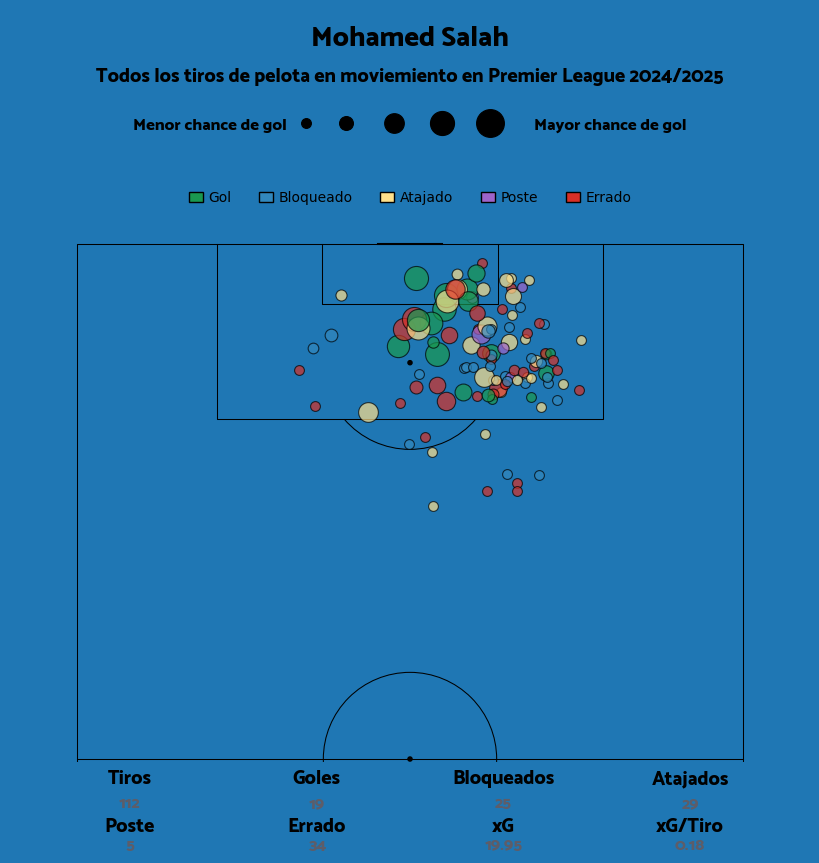

In [ ]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(x=0.5, y=.85, s='Mohamed Salah', fontsize=20, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
ax1.text(x=0.5, y=.7, s='Todos los tiros de pelota en moviemiento en Premier League 2024/2025', fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
ax1.text(x=0.25, y=0.5, s='Menor chance de gol', fontsize=12, color='black', ha='center', fontproperties=catamaran.prop)

x_positions = [0.37, 0.42, 0.48, 0.54, 0.60]
sizes = [50, 100, 200, 300, 400]
for x, s in zip(x_positions, sizes):
    ax1.scatter(x, 0.53, s=s, color="black", edgecolor='black', linewidth=0.8)

ax1.text(x=0.75, y=0.5, s='Mayor chance de gol', fontsize=12, color='black', ha='center', fontproperties=catamaran.prop)

resultados = {
    'Goal': '#1a9850',
    'BlockedShot': '#3288bd',
    'SavedShot': '#fee08b',
    'ShotOnPost': '#9e64c9',
    'MissedShots': '#d73027'
}

legend_elements = [
    Patch(facecolor='#1a9850', edgecolor='black', label='Gol'),
    Patch(facecolor='#3288bd', edgecolor='black', label='Bloqueado'),
    Patch(facecolor='#fee08b', edgecolor='black', label='Atajado'),
    Patch(facecolor='#9e64c9', edgecolor='black', label='Poste'),
    Patch(facecolor="#d73027", edgecolor='black', label='Errado')
]

ax1.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.3),
    ncol=len(legend_elements),
    frameon=False,
    fontsize=10,
    facecolor=background_color,
    labelcolor='black',
    handlelength=1,
    handletextpad=0.4
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)
pitch.draw(ax=ax2)

sizes = np.clip(df_tirosmov['xG'].astype(float)*500, 50, 300)

for shot, s in zip(df_tirosmov.to_dict(orient='records'), sizes):
    pitch.scatter(
        shot['X'],
        shot['Y'],
        s=s,
        color=resultados.get(shot['Resultado']),
        ax=ax2,
        alpha=0.7,
        linewidth=0.8,
        edgecolor='black'
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0, .2, 1, .1])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

result_counts = df_tirosmov['Resultado'].value_counts().to_dict()

stats = [
    ('Tiros', tiros_totalesmov),
    ('Goles', goles_totalesmov),
    ('Bloqueados', result_counts.get('BlockedShot', 0)),
    ('Atajados', result_counts.get('SavedShot', 0)),
    ('Poste', result_counts.get('ShotOnPost', 0)),
    ('Errado', result_counts.get('MissedShots', 0)),
    ('xG', total_xGmov),
    ('xG/Tiro', xG_por_tiromov)
]

stats_top = stats[:4]
stats_bottom = stats[4:]
x_pos = np.linspace(0.15, 0.85, 4)

# Fila superior
for (label, value), x in zip(stats_top, x_pos):
    ax3.text(x=x, y=0.55, s=label, fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
    ax3.text(x=x, y=0.35, s=f'{value:.2f}' if isinstance(value,float) else f'{value}', fontsize=12, color='#5d5d69', ha='center', fontproperties=catamaran.prop)

# Fila inferior
for (label, value), x in zip(stats_bottom, x_pos):
    ax3.text(x=x, y=0.15, s=label, fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
    ax3.text(x=x, y=0, s=f'{value:.2f}' if isinstance(value,float) else f'{value}', fontsize=12, color='#5d5d69', ha='center', fontproperties=catamaran.prop)

ax3.set_axis_off()

plt.show()


In [ ]:
fig.savefig('Salah_todos_los_tiros_openplay.png', bbox_inches='tight', transparent=True)

### Goles solos

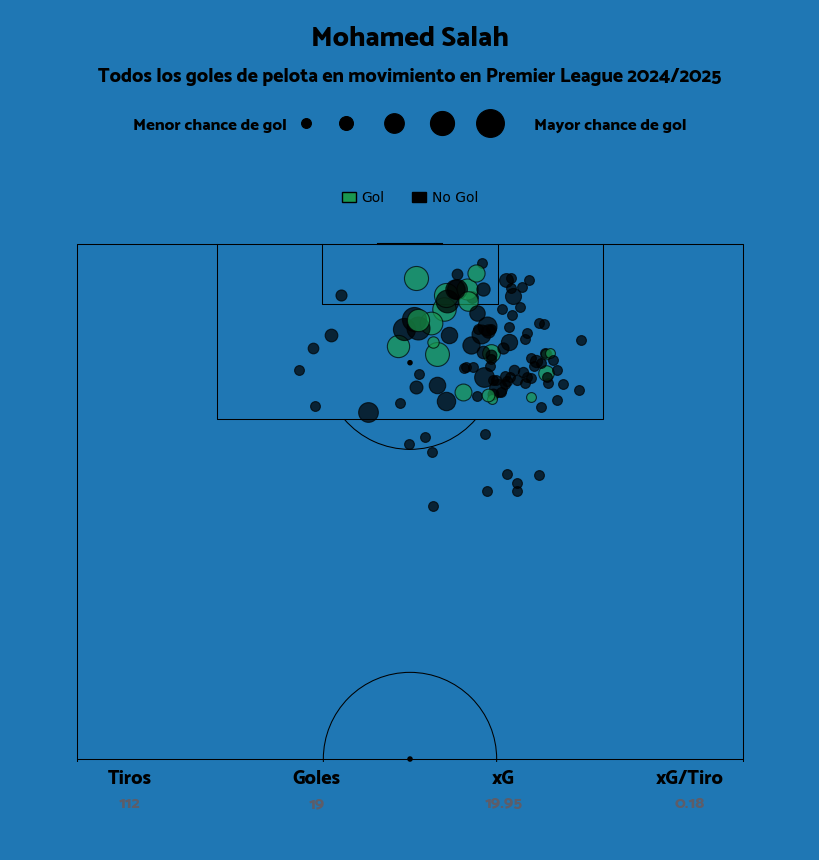

In [ ]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(x=0.5, y=.85, s='Mohamed Salah', fontsize=20, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
ax1.text(x=0.5, y=.7, s='Todos los goles de pelota en movimiento en Premier League 2024/2025', fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
ax1.text(x=0.25, y=0.5, s='Menor chance de gol', fontsize=12, color='black', ha='center', fontproperties=catamaran.prop)

x_positions = [0.37, 0.42, 0.48, 0.54, 0.60]
sizes = [50, 100, 200, 300, 400]
for x, s in zip(x_positions, sizes):
    ax1.scatter(x, 0.53, s=s, color="black", edgecolor='black', linewidth=0.8)

ax1.text(x=0.75, y=0.5, s='Mayor chance de gol', fontsize=12, color='black', ha='center', fontproperties=catamaran.prop)

resultados = {
    'Goal': '#1a9850',
    'No goal': '#000000',
}

legend_elements = [
    Patch(facecolor='#1a9850', edgecolor='black', label='Gol'),
    Patch(facecolor='#000000', edgecolor='black', label='No Gol'),
]

ax1.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.3),
    ncol=len(legend_elements),
    frameon=False,
    fontsize=10,
    facecolor=background_color,
    labelcolor='black',
    handlelength=1,
    handletextpad=0.4
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)
pitch.draw(ax=ax2)

sizes = np.clip(df_tirosmov['xG'].astype(float)*500, 50, 300)

for shot, s in zip(df_tirosmov.to_dict(orient='records'), sizes):
    pitch.scatter(
        shot['X'],
        shot['Y'],
        s=s,
        color=resultados.get(shot['Resultado'], "#000000"),
        ax=ax2,
        alpha=0.7,
        linewidth=0.8,
        edgecolor='black'
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0, .2, 1, .1])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

result_counts = df_tirosmov['Resultado'].value_counts().to_dict()

stats = [
    ('Tiros', tiros_totalesmov),
    ('Goles', goles_totalesmov),
    ('xG', total_xGmov),
    ('xG/Tiro', xG_por_tiromov)
]

stats_top = stats[:4]
stats_bottom = stats[4:]
x_pos = np.linspace(0.15, 0.85, 4)

for (label, value), x in zip(stats_top, x_pos):
    ax3.text(x=x, y=0.55, s=label, fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
    ax3.text(x=x, y=0.35, s=f'{value:.2f}' if isinstance(value,float) else f'{value}', fontsize=12, color='#5d5d69', ha='center', fontproperties=catamaran.prop)

for (label, value), x in zip(stats_bottom, x_pos):
    ax3.text(x=x, y=0.15, s=label, fontsize=14, fontweight='bold', color='black', ha='center', fontproperties=catamaran.prop)
    ax3.text(x=x, y=0, s=f'{value:.2f}' if isinstance(value,float) else f'{value}', fontsize=12, color='#5d5d69', ha='center', fontproperties=catamaran.prop)

ax3.set_axis_off()

plt.show()


In [ ]:
fig.savefig('Salah_todos_los_goles_openplay.png', bbox_inches='tight', transparent=True)